In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("uber.csv")

In [10]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [12]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [13]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [14]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [15]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [16]:
df['dropoff_longitude'].fillna(value= df['dropoff_longitude'].median(), inplace = True)
df['dropoff_latitude'].fillna(value= df['dropoff_latitude'].mean(), inplace = True)

In [17]:
df.isnull().sum().sum()

0

In [18]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [19]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [20]:
df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['dayofweek'] = df.pickup_datetime.dt.dayofweek
df['hour'] = df.pickup_datetime.dt.hour

In [21]:
from math import * 
# function to calculate the travel distance from the longitudes and latitudes 
def distance_transform(longitude1, latitude1, longitude2, latitude2): 
    travel_dist= [] 
    for pos in range(len(longitude1)): 
        long1,lat1,long2,lat2= map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]]) 
        dist_long= long2- long1
        dist_lat= lat2- lat1
        a= sin(dist_lat/2)**2 + cos(lat1) * cos(lat2) * sin(dist_long/2)**2 
        c= 2 * asin(sqrt(a))*6371 
        travel_dist.append(c) 
    return travel_dist

In [22]:
df['dist_travel_km'] = distance_transform(df['pickup_longitude'].to_numpy(),
                                          df['pickup_latitude'].to_numpy(),
                                          df['dropoff_longitude'].to_numpy(),
                                          df['dropoff_latitude'].to_numpy() )

In [23]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,hour,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,4.475450


In [24]:
df = df.drop('pickup_datetime', axis=1)

In [25]:
df.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,hour,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,4.475450


fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
year                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
month                AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.345976;0.352273x0.0920732)
hour                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dist_travel_km          AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

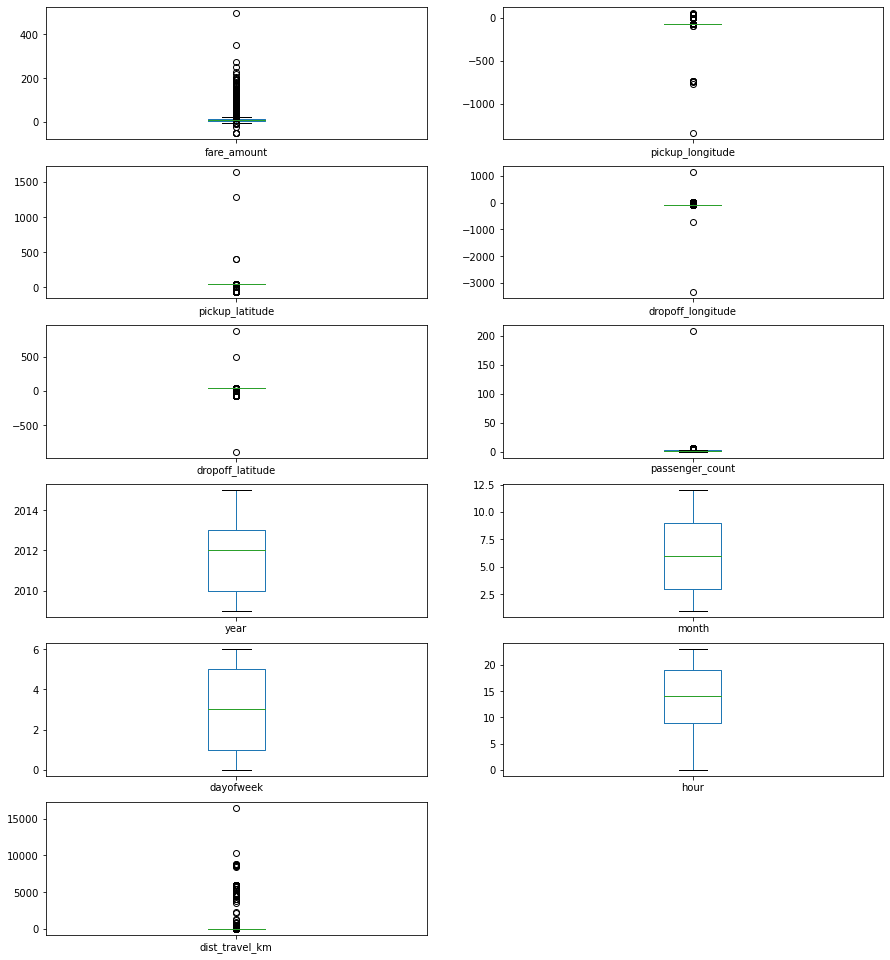

In [26]:
df.plot(kind="box", subplots=True, layout = (7,2), figsize= (15,20))

In [27]:
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    interQuantileRange = Q3 - Q1
    lowerLimit = Q1 - 1.5*interQuantileRange
    upperLimit = Q3 + 1.5*interQuantileRange
    df[col] = np.clip(df1[col], lowerLimit, upperLimit)
    return df1

def treat_all_outliers(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df, c)
    return df1

df = treat_all_outliers(df, df.iloc[: , 0::]) # all rows and columns.

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
year                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
month                AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.345976;0.352273x0.0920732)
hour                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dist_travel_km          AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

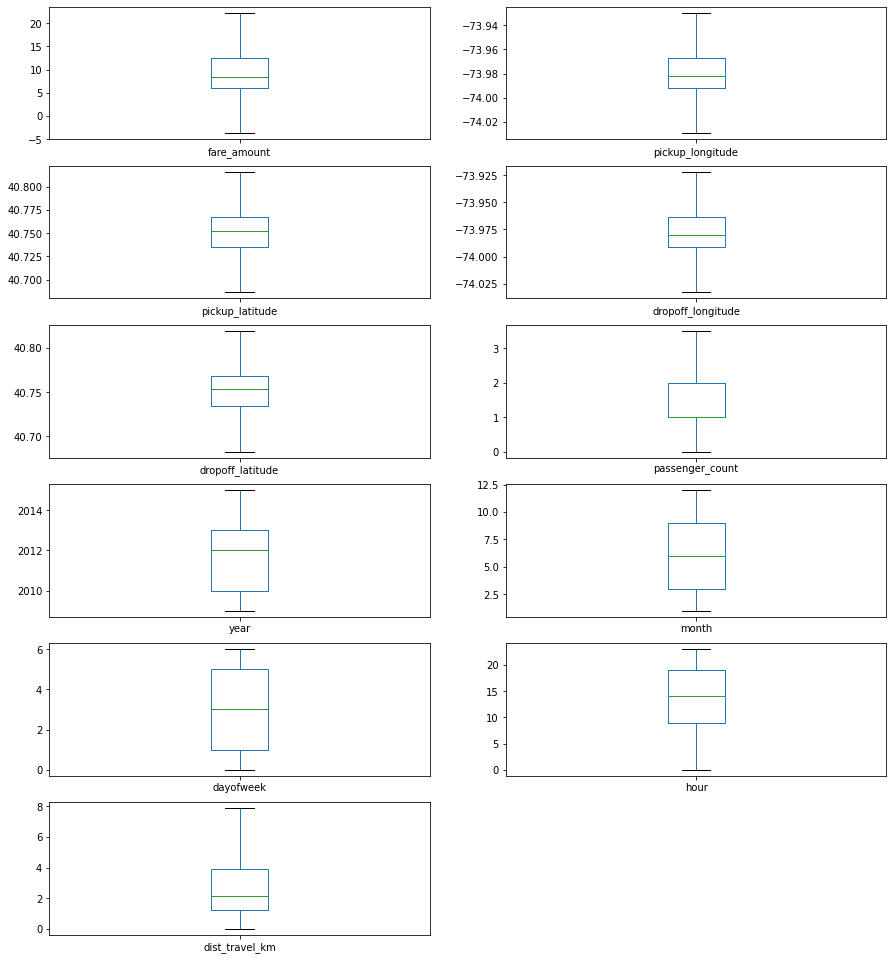

In [28]:
df.plot(kind="box", subplots=True, layout = (7,2), figsize= (15,20))

In [29]:
df= df.loc[(df.dist_travel_km>= 1) | (df.dist_travel_km<= 130)] 
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (200000, 11)


In [30]:
incorrect_coordinates= df.loc[(df.pickup_latitude> 90) |(df.pickup_latitude< -90) | 
                              (df.dropoff_latitude> 90) |(df.dropoff_latitude< -90) | 
                              (df.pickup_longitude> 180) |(df.pickup_longitude< -180) | 
                              (df.dropoff_longitude> 180) |(df.dropoff_longitude< -180) ] 
# print(incorrect_coordinates)
df.drop(incorrect_coordinates, inplace = True, errors='ignore')

In [31]:
df.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,hour,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,5,3,19,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,7,4,20,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,8,0,21,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,6,4,8,1.661683
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,2014,8,3,17,4.475450


In [32]:
corr = df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,hour,dist_travel_km
fare_amount,1.000000,0.154069,-0.110842,0.218675,-0.125898,0.015778,0.141277,0.030817,0.013652,-0.023623,0.844374
pickup_longitude,0.154069,1.000000,0.259497,0.425619,0.073290,-0.013213,0.010198,0.001169,-0.024652,0.011579,0.098094
pickup_latitude,-0.110842,0.259497,1.000000,0.048889,0.515714,-0.012889,-0.014243,0.001562,-0.042310,0.029681,-0.046812
dropoff_longitude,0.218675,0.425619,0.048889,1.000000,0.245667,-0.009303,0.011346,0.002391,-0.003336,-0.046558,0.186531
dropoff_latitude,-0.125898,0.073290,0.515714,0.245667,1.000000,-0.006308,-0.009603,-0.001193,-0.031919,0.019783,-0.038900
passenger_count,0.015778,-0.013213,-0.012889,-0.009303,-0.006308,1.000000,-0.009749,0.010351,0.048550,0.020274,0.009709
year,0.141277,0.010198,-0.014243,0.011346,-0.009603,-0.009749,1.000000,-0.115859,0.006113,0.002156,0.024278
month,0.030817,0.001169,0.001562,0.002391,-0.001193,0.010351,-0.115859,1.000000,-0.008786,-0.003926,0.011628
dayofweek,0.013652,-0.024652,-0.042310,-0.003336,-0.031919,0.048550,0.006113,-0.008786,1.000000,-0.086947,0.027053
hour,-0.023623,0.011579,0.029681,-0.046558,0.019783,0.020274,0.002156,-0.003926,-0.086947,1.000000,-0.038366


<AxesSubplot:>

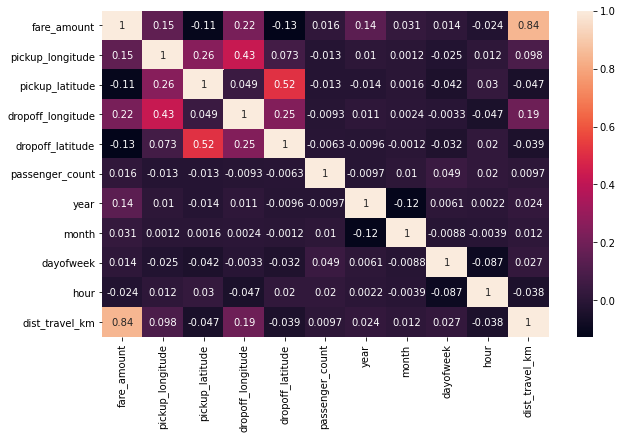

In [33]:
fig,axis= plt.subplots(figsize= (10,6)) 
sns.heatmap(df.corr(),annot= True)

In [34]:
x= df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','month','year','dayofweek','dist_travel_km']]
y = df['fare_amount']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=100)

In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
regression= LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [39]:
prediction = regression.predict(X_test)
print(prediction)

[ 5.45873977 11.172137   10.64265588 ... 11.00442528  5.45786094
  5.62748212]


In [40]:
y_test

180481     4.5
8971      15.0
77027     12.1
21656     14.1
58303     10.9
          ... 
40504     15.5
74283     18.0
89338      8.9
87953      5.3
198917     7.5
Name: fare_amount, Length: 40000, dtype: float64

In [44]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [49]:
r2_score(y_test,prediction)

0.7452338797132867

In [45]:
MSE= mean_squared_error(y_test,prediction)
RMSE= np.sqrt(MSE)
RMSE

2.751088574133062

In [48]:
# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)

In [61]:
r2_score(y_test,ridge_pred)
# RMSE_ridge = np.sqrt(mean_squared_error(y_test, ridge_pred))


0.7452271545745084

In [62]:
# Lasso Regression
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)

In [63]:
r2_score(y_test, lasso_pred)

0.7066547031617461

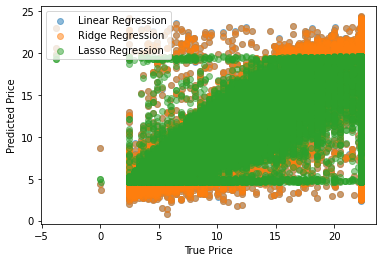

In [65]:
plt.scatter(y_test, prediction, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, ridge_pred, label='Ridge Regression', alpha=0.5)
plt.scatter(y_test, lasso_pred, label='Lasso Regression', alpha=0.5)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()